# Lab: Classification with Decision Trees

**Objectives of the practical work:**

1. Learn how to build decision trees with scikit-learn  
2. Be familiar with some parameters and visualization tools
3. Use a real-case dataset (COMPASS ) as an example
4. Evaluate diverse trees in terms of training and testing accuracies with different parameters
5. Study the impact of some parameters on the sensitivity aspect




## PART 1: Basic steps 

The following are basic instructions to start with decision trees. You need to execute them one by one to understand the basic steps for learning decision trees. Once you get familiar with the different steps, you will be working on the compass dataset. 

The decision tree package that we use is from scikit-learn. The full documentation of decision trees are available at https://scikit-learn.org/stable/modules/tree.html

Take a moment to briefly consult the documentation.

We need first to include some libraries: 




In [1]:
from sklearn import tree
from matplotlib import pyplot as plt # for a good visualization of the trees 

The following is a basic example for binary classification



In [32]:
# X is the training set 
# Each example in X has 4 binary features
X = [[0, 0, 1, 0], [0, 1, 0, 1] , [1, 1, 0, 0] , [1, 0, 1, 1] , [0, 0, 0, 1] , [1, 1, 1, 0]]
X_bigger = [[0, 0, 1, 0, 0], [0, 1, 0, 1, 0] , [1, 1, 0, 0, 0] , [1, 0, 1, 1, 1] , [0, 0, 0, 1, 0] , [1, 1, 1, 0, 1], [1,1,1,1,0], [0,0,0,0,1], [1,1,0,0,1]]
# Y is the classes associated with the training set. 
# For instance the label of the first and second example is 1; of the third example is 0, etc
Y = [1, 1, 0, 0, 1, 1]
Y_bigger = [1, 1, 0, 0, 1, 1, 1, 0, 1]

We construct a decision tree using the default parameters:

In [33]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y)
clf_bigger = tree.DecisionTreeClassifier()
clf_bigger = clf_bigger.fit(X_bigger, Y_bigger)

Now we can ask the decision tree to predict the outcome for unknown examples. 
For instance we can ask a prediction for the three examples:

In [41]:
predict = clf.predict([[1,1,1,1] , [0,1,0,0] , [1,1,0,1] ])
print(f"First model predictions: {predict}")
predict_bigger = clf_bigger.predict([[1,1,1,1,1] , [0,1,0,0,1] , [0,1,0,0,0] ])
print(f"Second model (bigger) predictions: {predict_bigger}")

First model predictions: [0 1 0]
Second model (bigger) predictions: [1 1 0]


The result is an array of the 3 predicted labels (one for each example): `array([0, 1, 0])`

## PART 2 : Visualization 

There are many ways to visualize a decision tree. The first one is very basic:



In [42]:
text_representation = tree.export_text(clf)
print(text_representation)
text_representation_bigger = tree.export_text(clf_bigger)
print(text_representation_bigger)

|--- feature_0 <= 0.50
|   |--- class: 1
|--- feature_0 >  0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 1
|   |--- feature_3 >  0.50
|   |   |--- class: 0

|--- feature_4 <= 0.50
|   |--- feature_3 <= 0.50
|   |   |--- feature_1 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  0.50
|   |   |   |--- class: 0
|   |--- feature_3 >  0.50
|   |   |--- class: 1
|--- feature_4 >  0.50
|   |--- feature_1 <= 0.50
|   |   |--- class: 0
|   |--- feature_1 >  0.50
|   |   |--- class: 1



We can use a more readable and visual way as follows:

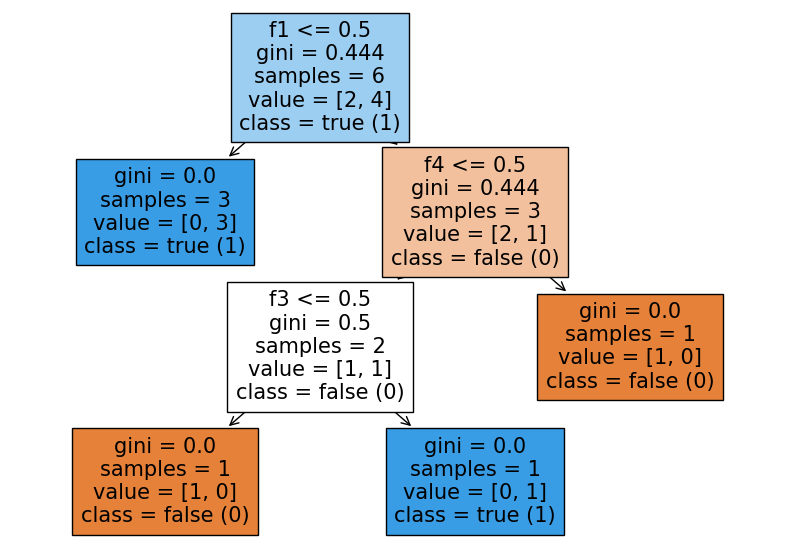

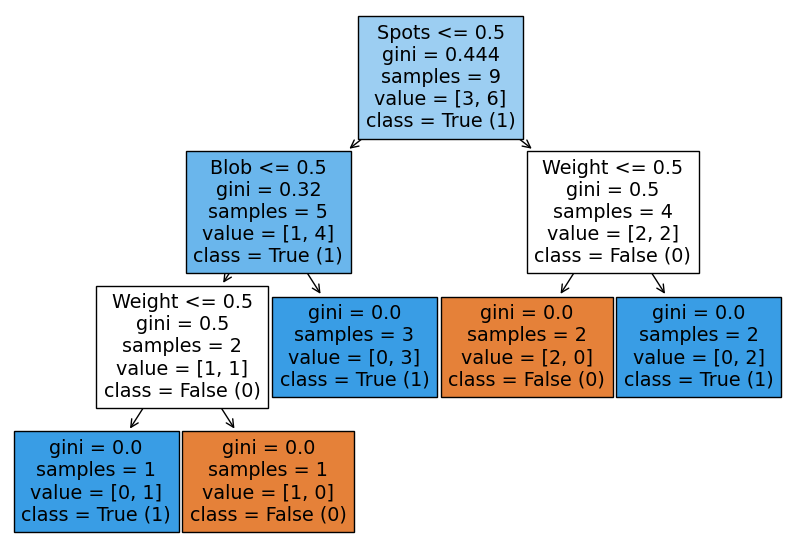

In [45]:
fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf,feature_names=("f1","f2","f3", "f4"),class_names= ("false (0)", "true (1)" ),filled=True)

fig_bigger = plt.figure(figsize=(10,7))
__ = tree.plot_tree(clf_bigger,feature_names=("Height","Weight","Length", "Blob", "Spots"),class_names= ("False (0)", "True (1)" ),filled=True)



Where:
- `figsize` restrains the size of the plot,
- `feature_names` gives the names of the different features,
- `class_names` corresponds to human readable labels for each class,
- `filled` is a boolean indicating a preference to show a colorful tree. 


**Tasks:**
- Construct manually a new binary dataset (larger than the one above), associate some labels then study the tree built by default (similar to above). Give some fancy names to the binary features and classes for a visual interpretation.
    - Ok

## PART 3: The compass dataset

We study here the COMPASS dataset as a case study. Recall that it has been used in a legislative context for predicting recidivism in the U.S. That is, the tendency of a convicted criminal to re-offend


Have a look at the original non-binary dataset ([https://www.kaggle.com/danofer/compass](https://www.kaggle.com/danofer/compass)) to understand the different features. Consider in particular the data used for fairness: propublicaCompassRecividism_data_fairml.csv


**Understanding the dataset:**

Take a moment to think about the following questions 

- What are the features? 
    - The features are classifiers for convicts, used to determine the probability of them commiting another crime in the next two years. The 165 different features describe the profile and criminal record of the person in question  
- How many examples in the dataset?
    - There are 5273 examples in the dataset
- What are your expectations regarding the most important features? 
    - I think some of the most important features will be regarding the number of prior crimes, felonies and misdemeanors a person/convict has. 
- Propose (informally) a way to reduce the dataset
    - A way to reduce the dataset could be to make a non-binary model where we can avoid using separate features for combinatory cases, such as the feature gender_Male__AND__juvenile-felonies_=0 that could be reduced to a gender feature and a juvenile felonines feature which can be combined. Many of the other features use such logic cases together, and by combining them the dataset/number of features could be reduced drastically while also allowing for less complex features. 
- There many ways to binarize the dataset. How do you propose to do so?



Below, we use a binarized version of the dataset that is used in the FairCORELS library (https://github.com/ferryjul/fairCORELS) as well some of its tools. 

You need first to download the dataset and the tools file and put them in your work directory:

- The dataset [compass.csv](compass.csv)
- The set of tools [utils.py](utils.py)

Load the binary dataset `compass.csv` as follows 

In [46]:
import csv
import numpy as np
from utils import load_from_csv

train_examples, train_labels, features, prediction = load_from_csv("./compass.csv")

print(f"train_examples: {train_examples}, number of examples: {len(train_examples)}")
print(f"train_labels: {train_labels}, number of labels: {len(train_labels)}")
print(f"features: {features}, number of features: {len(features)}")
print(f"prediction: {prediction}")

train_examples: [[1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]], number of examples: 5273
train_labels: [1 0 0 ... 1 0 1], number of labels: 5273
features: ['race_African-American', 'race_Caucasian', 'gender_Female', 'gender_Male', 'age_18-20', 'age_21-22', 'age_23-25', 'age_26-45', 'age_>45', 'juvenile-felonies_=0', 'juvenile-felonies_>0', 'juvenile-misdemeanors_=0', 'juvenile-misdemeanors_>0', 'juvenile-crimes_=0', 'juvenile-crimes_>0', 'priors_0', 'priors_1', 'priors_2-3', 'priors_>3', 'charge_degree_Misdemeanor', 'charge_degree_Felony', 'not_gender_Female', 'not_gender_Male', 'not_age_18-20', 'not_age_21-22', 'not_age_23-25', 'not_age_26-45', 'not_age_>45', 'not_juvenile-felonies_=0', 'not_juvenile-felonies_>0', 'not_juvenile-misdemeanors_=0', 'not_juvenile-misdemeanors_>0', 'not_juvenile-crimes_=0', 'not_juvenile-crimes_>0', 'not_priors_0', 'not_priors_1', 'not_priors_2-3', 'not_priors_>3', 'not_charge_degree_

Inspect each of these 4 objects. 
What do they represent? 
- The train_examples refer to the data which is used for the training of the model. The train_labels are the corresponding label that shows what value should be predicted/determined for each training data point. The features is what is being considered for each decision, these are the categories that the model tests for each prediction. prediction is the type of prediction being made, in this case whether or not the model predicts if the person/convict will do more crime in the following two year period. 
    
How many features? 
- There are 165 different features. 

Examples? 
- train_examples: An array of 165 1's and 0's that each correspond to if a feature is activated (over treshold)
- train_labels: An array of 5273 1's and 0's that correspond to the outcome of each of the 5273 train_examples
- features: An example of a feature is whether or not the person/convict is African-American or not
- prediction: two_year_recid

Have a look at the different parameters of the `DecisionTreeClassifier` class constructor. We will be studying three parameters: 

- splitter (default: Best or random)
- max_depth (default: None)
- min_samples_leaf (default: 1)

What do they represent? 
- Splitter corresponds to the strategy chosen to split each node, i.e. choosing how to determine how to split the tree into branches. 
- max_depth corresponds to the maximum depth of the tree, the default value is None which means that the tree we're creating can be as tall as we want. However, in order to not overfit the model, a max depth is set to limit overfitting the model. 
- min_samples_leaf corresponds to the minimum number of samples required to be at a leaf node. This means that we need a certain amount of examples in order for our tree to create a new leaf. Setting this will also allow for pruning the tree to not be overfitted, as we need for examples to reoccur in order to be considered an admissible example. 

**Tasks:**

- 1:  Build severals decision trees (different parameters) and visualize them
- 2: Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% for training and 20% for test *multiple times*.
- 3: Do again the evaluation using 5-cross-validation
- 4: Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs. 
- 5: Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
- 6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.

In [58]:
features_convict_1 = np.ones(165)
features_convict_2 = np.zeros(165)
features_convict_3 = np.round(np.random.rand(165)) 
#print(features_convict_3)

Tree 1
[1 0 0]


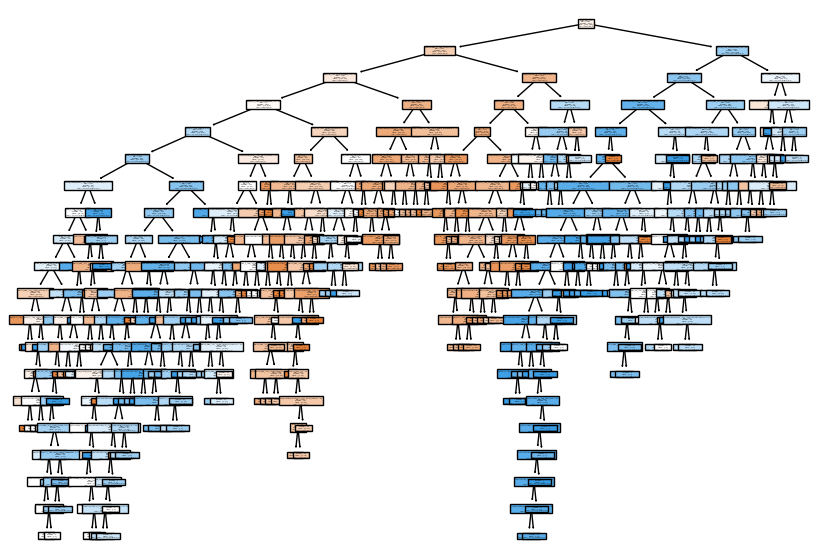

In [59]:
##1 Build severals decision trees (different parameters) and visualize them
#1 Tree with standard configurations: best splitting, 1 min_samples_leaf, None max_depth
print("Tree 1")
clf_1 = tree.DecisionTreeClassifier()
clf_1 = clf_1.fit(train_examples, train_labels)


predict_1 = clf_1.predict([features_convict_1, features_convict_2, features_convict_3])
print(predict_1)

fig_1 = plt.figure(figsize=(10,7))
_1 = tree.plot_tree(clf_1,feature_names=features,class_names= ("Free to go (0)", "Two year recidivism (1)" ),filled=True)

Tree 2
[1 0 0]


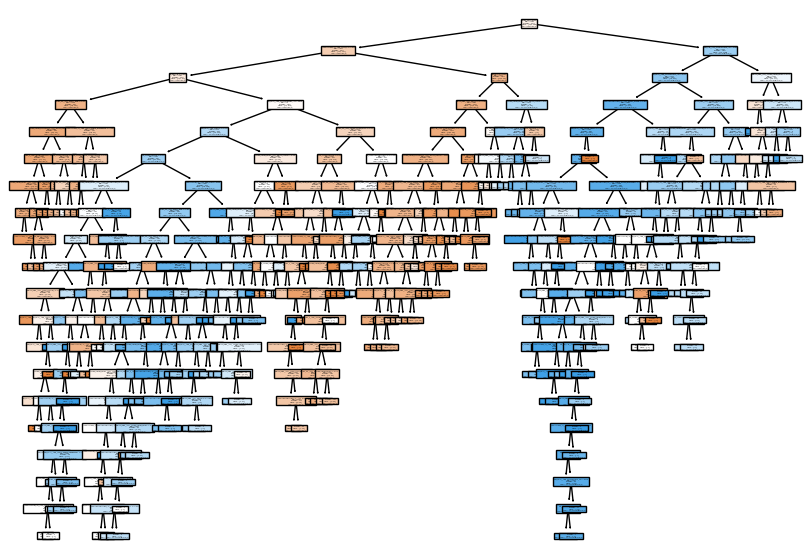

In [60]:
#2 Random splitting, min_samples_leaf = 1, None max_depth
print("Tree 2")
clf_2 = tree.DecisionTreeClassifier(splitter="random")
clf_2 = clf_2.fit(train_examples, train_labels)


predict_2 = clf_2.predict([features_convict_1, features_convict_2, features_convict_3])
print(predict_2)

fig_2 = plt.figure(figsize=(10,7))
_2 = tree.plot_tree(clf_2,feature_names=features,class_names= ("Free to go (0)", "Two year recidivism (1)" ),filled=True)

Tree 3
[1 0 1]


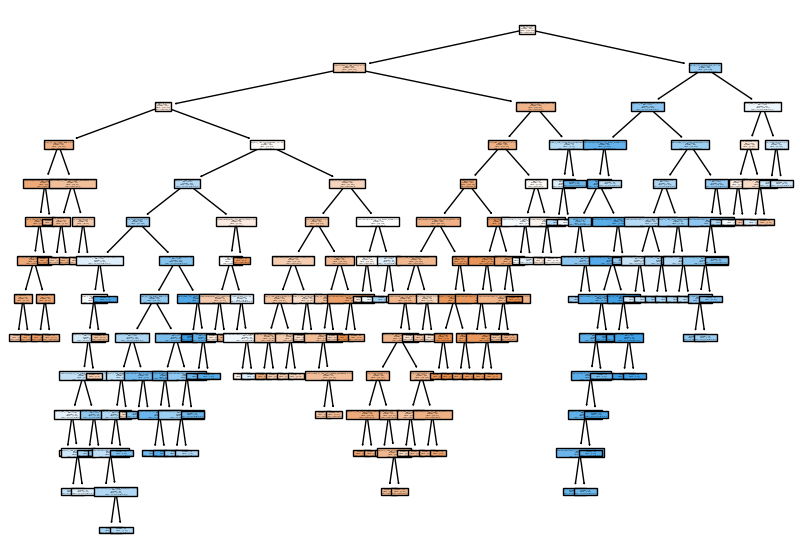

In [61]:
#3 Best splitting, min_samples_leaf = 15, None max_depth
print("Tree 3")
clf_3 = tree.DecisionTreeClassifier(min_samples_leaf=15)
clf_3 = clf_3.fit(train_examples, train_labels)


predict_3 = clf_3.predict([features_convict_1, features_convict_2, features_convict_3])
print(predict_3)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_3,feature_names=features,class_names= ("Free to go (0)", "Two year recidivism (1)" ),filled=True)

Tree 4
[0 1 0]


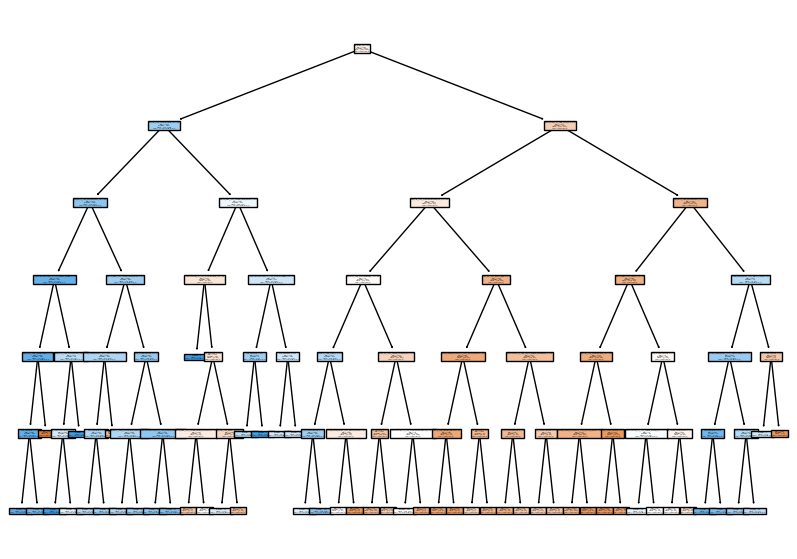

In [63]:
#4 Best splitting, min_samples_leaf = 1, max_depth = 6
print("Tree 4")
clf_4 = tree.DecisionTreeClassifier(max_depth=6)
clf_4 = clf_4.fit(train_examples, train_labels)


predict_4 = clf_4.predict([features_convict_1, features_convict_2, features_convict_3])
print(predict_4)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_4,feature_names=features,class_names= ("Free to go (0)", "Two year recidivism (1)" ),filled=True)

Tree 5
[1 0 1]


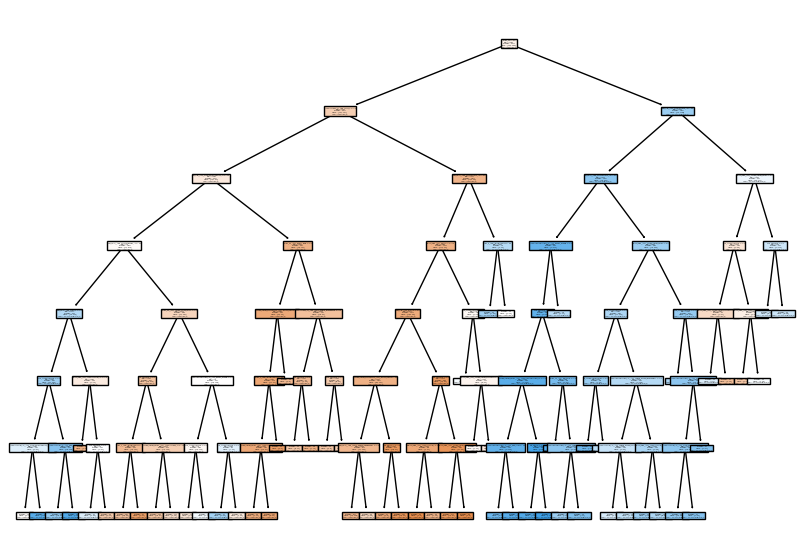

In [171]:
#5 Best splitting, min_samples_leaf = 20 and max_depth = 7
print("Tree 5")
clf_5 = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=20)
clf_5 = clf_5.fit(train_examples, train_labels)


predict_5 = clf_5.predict([features_convict_1, features_convict_2, features_convict_3])
print(predict_5)

fig = plt.figure(figsize=(10,7))
_ = tree.plot_tree(clf_5,feature_names=features,class_names= ("Free to go (0)", "Two year recidivism (1)" ),filled=True)

In [172]:
##2 Run a solid evaluation on different trees (with different parameters) by randomly splitting the data 80% 
## for training and 20% for test multiple times.
from sklearn.model_selection import train_test_split

#test size 20% and training size 80%, random_state=1 allows us to split the training set randomly
x_train, x_test, y_train, y_test = train_test_split(train_examples, train_labels, random_state=1, test_size=0.20) 
x_train_1, x_test_1, y_train_1, y_test_1 = train_test_split(train_examples, train_labels, random_state=1, test_size=0.20) 
x_train_2, x_test_2, y_train_2, y_test_2 = train_test_split(train_examples, train_labels, random_state=2, test_size=0.20) 
x_train_3, x_test_3, y_train_3, y_test_3 = train_test_split(train_examples, train_labels, random_state=5, test_size=0.20) 
x_train_4, x_test_4, y_train_4, y_test_4 = train_test_split(train_examples, train_labels, random_state=10, test_size=0.20) 
x_train_5, x_test_5, y_train_5, y_test_5 = train_test_split(train_examples, train_labels, random_state=13, test_size=0.20) 

#Evaluation: 
#1
#same result with min_samples_leaf = {20,21,22}, with splitter as best or random
clf_1_bis = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=20) 

clf_1_bis = clf_1_bis.fit(x_train_1, y_train_1)

score_1_bis = clf_1_bis.score(x_test_1, y_test_1)
print(f"Score 1 with first data set split: {score_1_bis}")

Score 1 with first data set split: 0.6824644549763034


##4 Evaluate the impact (in terms of accuracy) of the three parameters : maximum depth, splitting criterion, and the minimum sample leafs.

We notice that the score doesn't change when we change which random train-test-split we're using. 

We also remark that when somewhat changing max_depth and min_samples_leaf between 5 and 25, we don't alter the accuracy of the model much.

However, when using a cross-validation method, we notice that our clf_5 scores better than our previously better-scoring model. Our theory is that our model with max depth 5 and min samples leaf 20 begins to overfit when trained with cross-validation. 

In [177]:
#2
clf_1_bis = clf_1_bis.fit(x_train_2, y_train_2)

score_2_bis = clf_1_bis.score(x_test_2, y_test_2)
print(f"Score 2: {score_2_bis}")

#3
clf_1_bis = clf_1_bis.fit(x_train_3, y_train_3)

score_3_bis = clf_1_bis.score(x_test_3, y_test_3)
print(f"Score 3: {score_3_bis}")

#4
clf_1_bis = clf_1_bis.fit(x_train_4, y_train_4)

score_4_bis = clf_1_bis.score(x_test_4, y_test_4)
print(f"Score 4: {score_4_bis}")

#5
clf_1_bis = clf_1_bis.fit(x_train_5, y_train_5)

score_5_bis = clf_1_bis.score(x_test_5, y_test_5)
print(f"Score 5: {score_5_bis}")


Score 2: 0.6644549763033175
Score 3: 0.6748815165876777
Score 4: 0.680568720379147
Score 5: 0.6947867298578199


In [178]:
##3 Do the evaluation again using 5-cross-validation. 
## We're reusing the configuration we used for our fifth tree: max_depth = 7 and min_samples_leaf = 20

from sklearn.model_selection import cross_val_score

clf_ = tree.DecisionTreeClassifier(max_depth=7, min_samples_leaf=20) 

clf_ = clf_.fit(x_train, y_train) 

train_scores = cross_val_score(clf_, x_train, y_train, cv=5, scoring='f1_macro')
print(f"Training scores: {train_scores}")
test_scores = clf_.score(x_test, y_test)
print(f"Test scores: {test_scores}")

Training scores: [0.6533743  0.66269281 0.64759515 0.68089002 0.65182347]
Test scores: 0.6824644549763034


We notice that the test score increases when we use the 5-fold cross validation method as opposed to the random training and testing split. This method allows to reduce biasing while also balancing our tree based on iterating through our training, thus improving training scores. 

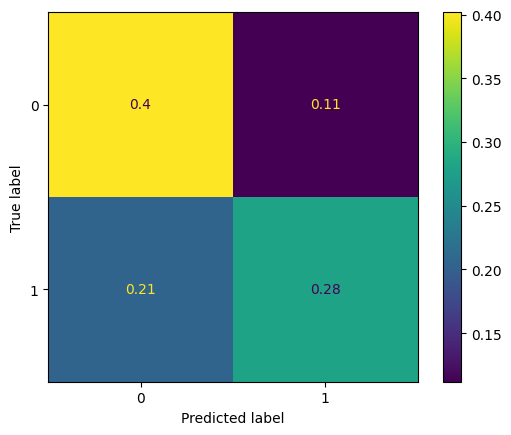

In [186]:
##5 Study the confusion matrix to evaluate the True/False Positive/Negative Rate. What are the most important parameters? 
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
y_true = y_test
y_prediction = clf_.predict(x_test)


cm = confusion_matrix(y_true, y_prediction, normalize='all', labels=clf_.classes_)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf_.classes_)
disp.plot()
plt.show()

The biggest/most occurant parameters are true negative (0,0) et true positive (1,1) (the right guesses/predictions), however the false positive and false negatives are important to consider as these are bad recommendations/predictions which could have dangerous consequences. In our case, there are many false predictions, which has to be taken into consideration when using/relying on this model. 

6: Propose a way to assess whether the algorithm is fair to a particular ethnic group.
- We could consider looking at / isolating confusion matrices for each featured ethnic group, then comparing the different models and considering if the bias is bigger or not for different ethnicities. This could allow us to assess the models fairness. We could thus split the dataset into two groups: caucasians and african-americans, then look at the differences between the confusion matrix for caucasians and the one for african-americans.  


In [188]:
from utils import get_fairness_metric_object


